밑바닥부터 시작하는 딥러닝 2
# 3.1 추론 기반 기법과 신경망신경망

### 통계 기반 기법의 문제점

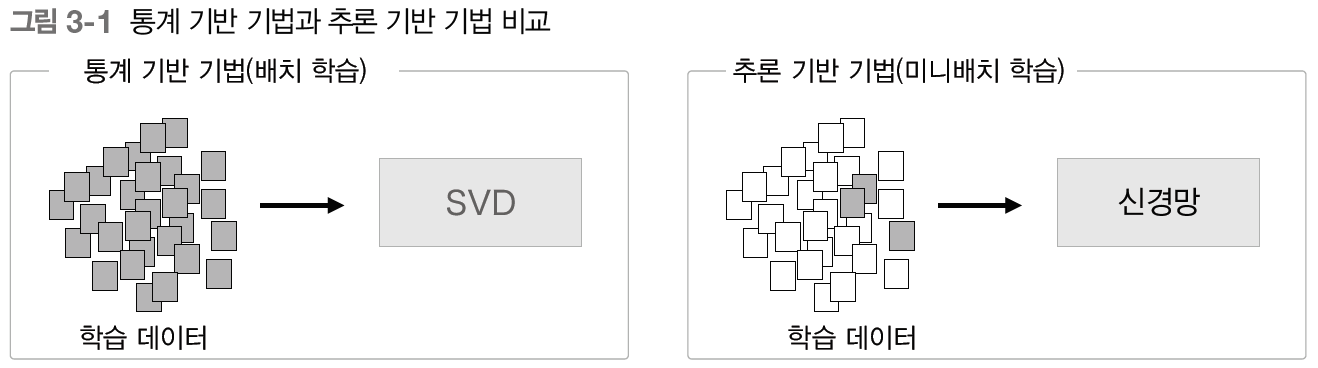

* 통계 기반 기법: 학습 데이터를 한꺼번에 처리-> 배치 학습
* 추론 기반 기법: 학습 데이터 일부를 사용하여 순차적으로 학습-> 미니배치 학습
* 따라서, 말뭉치 어휘 수가 많아 한번에 거대 행렬의 SVD를 계산해야 하는 통계 기반 기법에서의 단점을 극복한 것이 추론 기반 기법

### 추론 기반 기법 개요

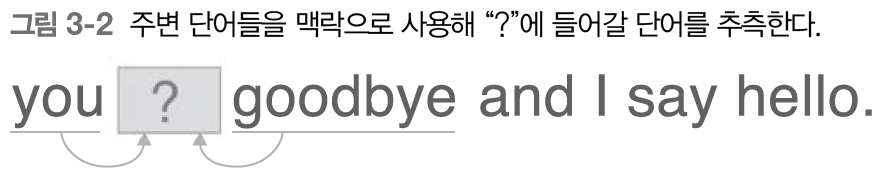

추론이란 주변 단어(맥락)가 주어졌을 때 무슨 단어가 들어가는지 추측하는 작업 -> 여러 추론 문제를 반복해서 풀면서 단어의 출현 패턴 학습

** 신경망은 맥락 정보를 입력받아 각 단어의 출현 확률 출력 (올바른 추측 내놓도록 학습)

** 통계기반 기법과 동일하게 단어의 의미는 주변 단어에 의해 형성된다는 가설에 기초

### 신경망에서의 단어 처리

단어를 있는 그대로 처리할 수 없어 '고정 길이의 벡터'로 변환: 원-핫 벡터로 변환 (벡터의 원소 중 하나만 1, 나머지 0)

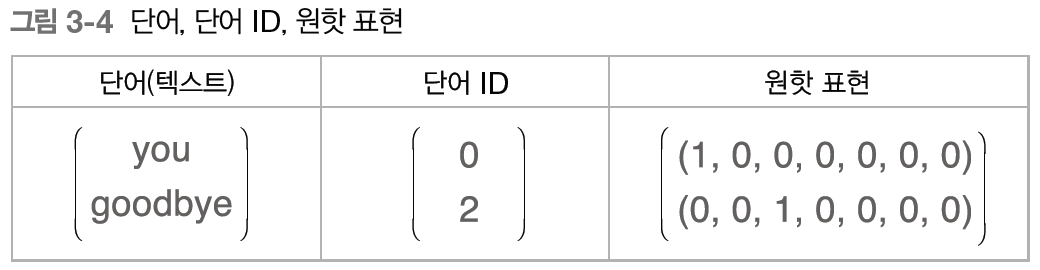

* you say goodbye and i say hello.
* 말뭉치 어휘: you, say, goodbye, and, i ,hello, . (7개)

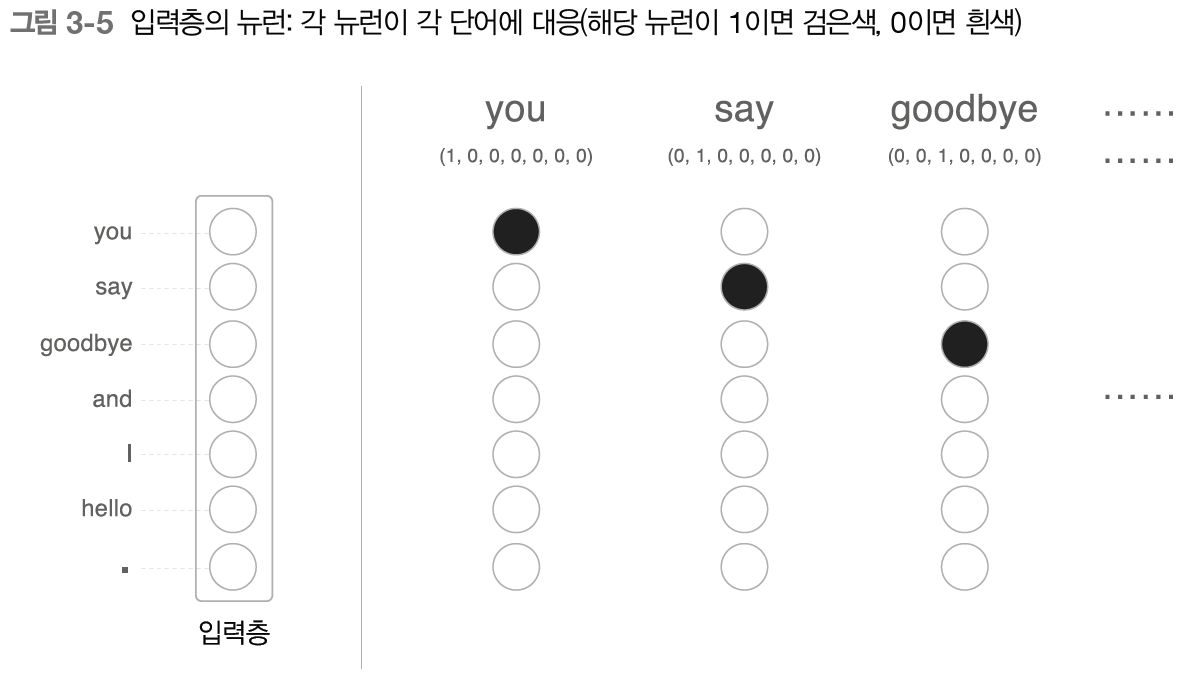

* 1이면 검은색, 0이면 흰색
* 단어를 고정 길이 벡터로 변환하면 신경망의 입력층은 뉴런의 수를 '고정'할 수 있음

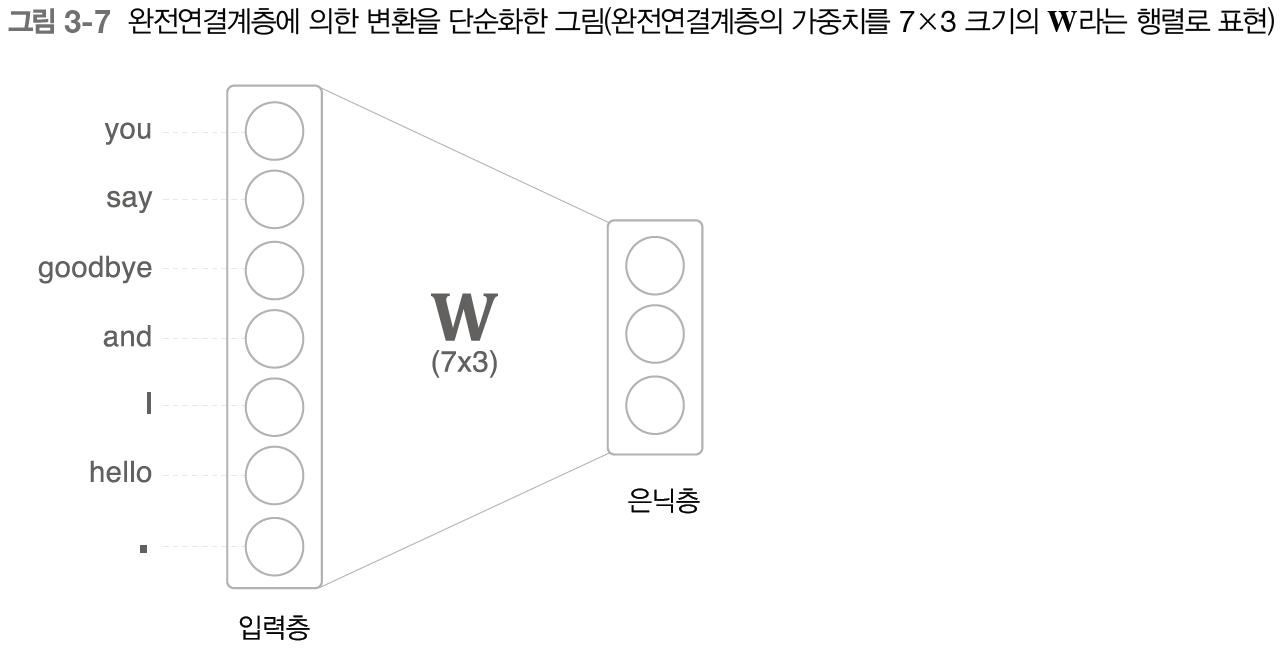

In [1]:
import numpy as np

c = np.array([[1, 0, 0, 0, 0, 0, 0]]) # 입력
W = np.random.randn(7, 3) # 가중치
h = np.matmul(c, W) # 중간 노드
print(h)

[[-0.41870358 -0.54628305 -0.65606683]]


* 단어 ID가 0인 단어를 원핫으로 표현한 후 완전연결계층을 통과시켜 변환한 결과

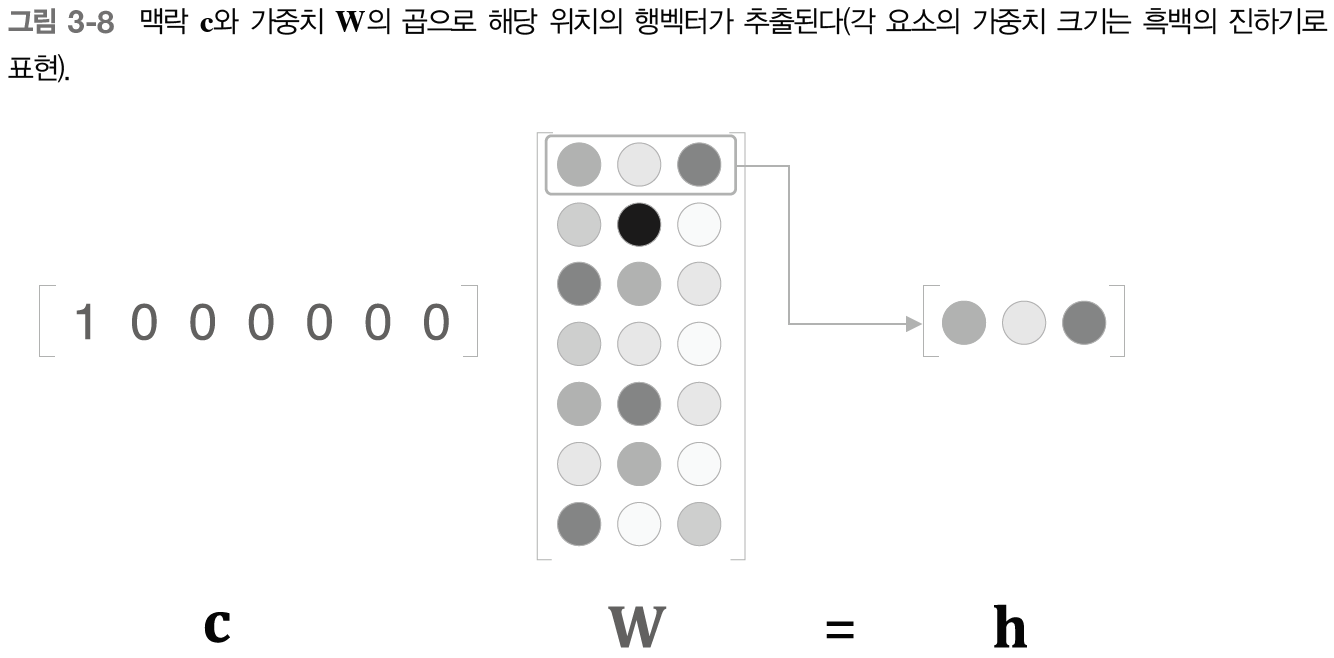

In [2]:
import sys
sys.path.append('/Users/sungahwang/Desktop/DL/DLfromScratch2')
import numpy as np
from common.layers import MatMul

In [3]:
c = np.array([[1, 0, 0, 0, 0, 0, 0]])
w = np.random.randn(7, 3)
layer = MatMul(W)
h = layer.forward(c)
print(h)

[[-0.41870358 -0.54628305 -0.65606683]]


* c와 W의 행렬 곱은 결국 가중치의 행벡터 하나를 뽑아낸 것과 같음 (비효율적)

-> 개선 필요(4.1 word2vec 개선1)